In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
%matplotlib inline
plt.style.use('ggplot')

# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', rng=rng)
valid_data = MNISTDataProvider('valid', rng=rng)
input_dim, output_dim = 784, 10

In [2]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, _ = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, fig_1, ax_1, fig_2, ax_2

Epoch 5: 61.7s to complete
    error(train)=2.30e+00, acc(train)=1.14e-01, error(valid)=2.31e+00, acc(valid)=1.06e-01
Epoch 10: 62.6s to complete
    error(train)=2.30e+00, acc(train)=1.14e-01, error(valid)=2.30e+00, acc(valid)=1.06e-01
Epoch 15: 62.8s to complete
    error(train)=2.30e+00, acc(train)=9.94e-02, error(valid)=2.30e+00, acc(valid)=9.90e-02
Epoch 20: 61.4s to complete
    error(train)=2.30e+00, acc(train)=1.14e-01, error(valid)=2.30e+00, acc(valid)=1.06e-01
Epoch 25: 61.4s to complete
    error(train)=1.48e+00, acc(train)=4.09e-01, error(valid)=1.46e+00, acc(valid)=4.17e-01
Epoch 30: 61.6s to complete
    error(train)=1.17e+00, acc(train)=5.53e-01, error(valid)=1.15e+00, acc(valid)=5.65e-01
Epoch 35: 61.4s to complete
    error(train)=5.06e-01, acc(train)=8.69e-01, error(valid)=4.91e-01, acc(valid)=8.73e-01
Epoch 40: 50.1s to complete
    error(train)=4.26e-01, acc(train)=8.85e-01, error(valid)=4.38e-01, acc(valid)=8.90e-01
Epoch 45: 49.9s to complete
    error(train)=3.25

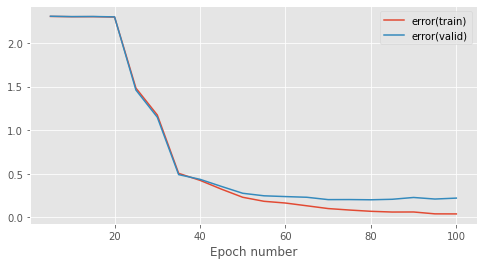

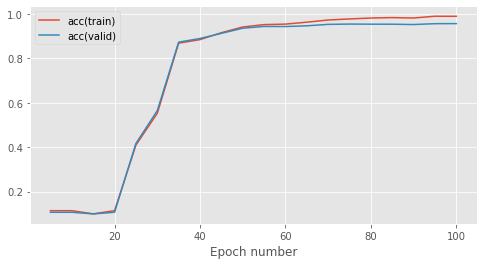

In [9]:
# Set training run hyperparameters
batch_size = 100  # number of data points in a batch
init_scale = 0.1  # scale for random parameter initialisation
learning_rate = 0.1  # learning rate for gradient descent
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a parameter initialiser which will sample random uniform values
# from [-init_scale, init_scale]
param_init = UniformInit(-init_scale, init_scale, rng=rng)

layers = [
     AffineLayer(input_dim, 100, param_init, param_init),
    SigmoidLayer(),
     AffineLayer(100, 100, param_init, param_init),
    SigmoidLayer(),
     AffineLayer(100, 100, param_init, param_init),
    SigmoidLayer(),
     AffineLayer(100, 100, param_init, param_init),
    SigmoidLayer(),
    AffineLayer(100,output_dim, param_init, param_init)
]
# Create affine model (outputs are logs of unnormalised class probabilities)
model = MultipleLayerModel(layers)

# Initialise the error object
error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

In [ ]:
#2 to 4 layer:  quicker convergence and better performance
#5 why the curve at first do not converge?
#init scale:  need to be small, otherwise converge slowly.